# Beth Chesman

## Research question/interests

From the data, I want to see what trends lie within genre and platform type. I believe there will definitley be clear relationships in certain regions where perticular games will be trending more than in other regions due to advertising and a number of other factors, so I'm not interested in uncovering the numbers on this. Specifically what I wish to determine is; whether there are certain time frames where some genres were at their peak due to popularity. Does critic score actually affect sales? Does a more violent rating lower user count? 

Finally, I wish to compare my favourite childhood game to my sister's favourite; Skylanders: Spyro's Adventure and Halo 3. She is older than me and was attracted to shooter games, whereas I liked fantasy games with quests, so I would like to see how these very different games can both be reduced to a score of the same metric.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv("../data/raw/Video_Games.csv")
data_raw

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Task 1: EDA

Looking to see any trends in the data

In [3]:
data_raw.shape

(16719, 16)

In [4]:
data_raw.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data_raw.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

A few plots to examine some of the clear trends in the data:

Text(0.5, 1.0, 'Correlation strength between sales, score, count, and year parameters')

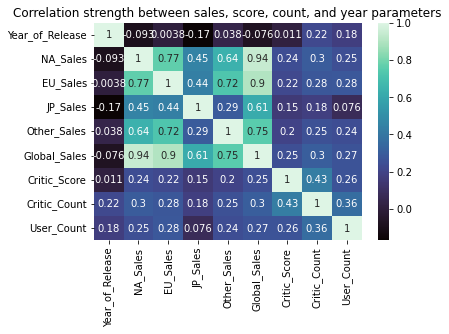

In [7]:
dcopy = data_raw.copy()
data_raw_mx = data_raw.corr()
sns.heatmap(data_raw_mx, xticklabels=data_raw_mx.columns, yticklabels=data_raw_mx.columns, annot=True, cmap = sns.color_palette("mako", as_cmap=True))
plt.title("Correlation strength between sales, score, count, and year parameters")

It can be noted that there's an obvious correleation between Global sales and the region's individual sales. As well, User score isn't seen because it's stored as an object, so we'll change this later.

Text(0.5, 1.0, 'Rating vs. Global Sales')

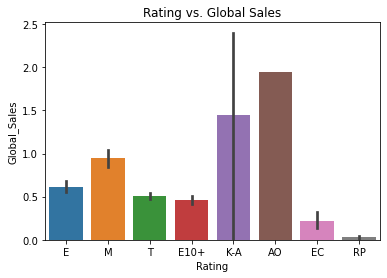

In [8]:
sns.barplot(x='Rating', y='Global_Sales', data=data_raw)
plt.title("Rating vs. Global Sales")

This plot shows an unexpected relationship than what was previously expected. Aswell, we see there are a lot of missing values by the large error bars, so we know the data needs some cleaning later on. Games with a rating of AO (adults only) accumulate more sales, globally, than E (everyone) or even K-A (kids to adults). Keeping this in  mind, over all the years our dataframe contains, it shows that the average consumers age (should) be closer to 18+, however younger kids playing games with the AO rating could effect these results. We can examine this trend closer by adding the release year to this comparison:

Text(0.5, 1.0, 'Year vs. Global Sales')

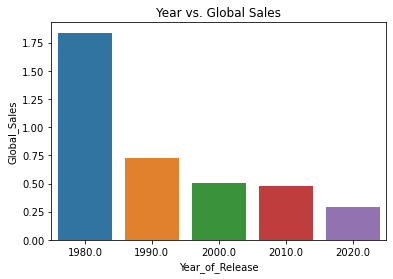

In [9]:
dcopy['Year_of_Release'] = dcopy['Year_of_Release'] - dcopy['Year_of_Release'] % 10
df_decade = (dcopy.groupby(['Year_of_Release']).mean().reset_index())
sns.barplot(x='Year_of_Release', y='Global_Sales', data=df_decade)
plt.title("Year vs. Global Sales")

There has been a continuous decrease in video game sales over the last five decades. This plot tells us that although sales mostly have been coming from adults, this could be due to them being initially popular with adults in the 80's and 90's.

Next, we'll compare critic score to user count.

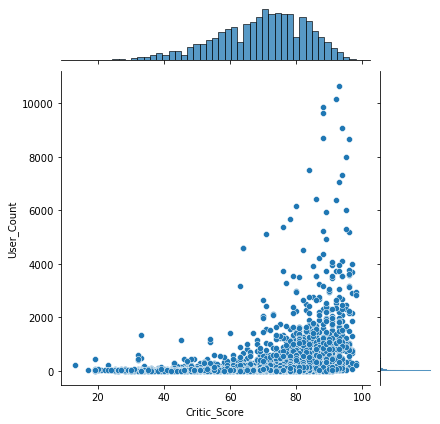

In [10]:
sns.jointplot(x='Critic_Score',y='User_Count',data=data_raw)

A better plot type could have been used to display this data because there's a lot of overlapping points, it's difficult to view all the data. However, there is a clear relationship between critic score and user count.

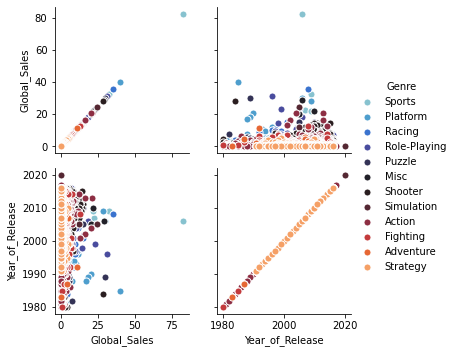

In [11]:
data_pair = sns.PairGrid(data_raw, hue="Genre", palette="icefire", vars=('Global_Sales','Year_of_Release'))
data_pair.map(plt.scatter, s=50, edgecolor="white")
data_pair.add_legend()

Looking at the plot, it's seen that shooter and role-playing games are favoured now, however, simulation and racing games were more popular in the 90's. Also, this plot displayed an opposig trend than our prior global sales vs. year of release bar plot. Looking into this further:

<AxesSubplot:xlabel='User_Count', ylabel='Global_Sales'>

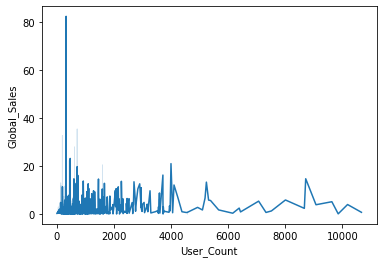

In [12]:
sns.lineplot(x='User_Count',y='Global_Sales',data=data_raw)

Here we see that there is no clear correlation between user count and sales, looking into this further:

<AxesSubplot:xlabel='Year_of_Release', ylabel='User_Count'>

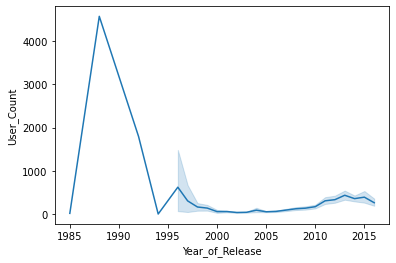

In [13]:
sns.lineplot(x='Year_of_Release',y='User_Count', data=data_raw)

<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

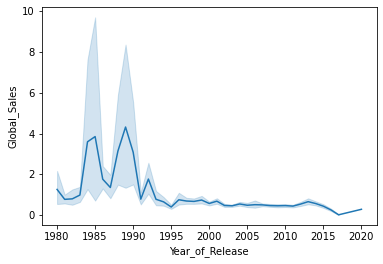

In [14]:
sns.lineplot(x='Year_of_Release',y='Global_Sales', data=data_raw)

## Analysis Pipeline

In [45]:
d_cleaned = data_raw
d_cleaned = d_cleaned[d_cleaned['Global_Sales'] >= 0] # removes rows with 0 sales
d_cleaned = d_cleaned.copy().drop(['Developer','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count'], axis=1).dropna(axis=0) # removes Global_Sales (and all other sales) like mentioned before and developer since we wont't be looking into that
d_cleaned['User_Score'] = d_cleaned['User_Score'].astype(np.float64)
corr = d_cleaned.corr()
d_cleaned.reset_index()
print(d_cleaned.shape)
d_cleaned.head
d_cleaned.info()

(6825, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   Global_Sales     6825 non-null   float64
 6   Critic_Score     6825 non-null   float64
 7   User_Score       6825 non-null   float64
 8   User_Count       6825 non-null   float64
 9   Rating           6825 non-null   object 
dtypes: float64(5), object(5)
memory usage: 586.5+ KB


## Method Chaining

In [55]:
import pandas as pd
import numpy as np


df = (
        pd.read_csv("../data/raw/Video_Games.csv")
        .dropna(subset=['Global_Sales'])
        .loc[lambda x: x['Year_of_Release'] <= 2016]
        .loc[lambda x: x['Critic_Score'] >= 0]
        
)

print(df)

                          Name Platform  Year_of_Release      Genre  \
0                   Wii Sports      Wii           2006.0     Sports   
2               Mario Kart Wii      Wii           2008.0     Racing   
3            Wii Sports Resort      Wii           2009.0     Sports   
6        New Super Mario Bros.       DS           2006.0   Platform   
7                     Wii Play      Wii           2006.0       Misc   
...                        ...      ...              ...        ...   
16700                   Breach       PC           2011.0    Shooter   
16701         Bust-A-Move 3000       GC           2003.0     Puzzle   
16702         Mega Brain Boost       DS           2008.0     Puzzle   
16706  STORM: Frontline Nation       PC           2011.0   Strategy   
16709                  15 Days       PC           2009.0  Adventure   

                   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                   Nintendo     41.36     28.96      3.77         8.45 

In [56]:

def load_and_process(path):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(path)
        .dropna(subset=['Global_Sales'])
        .loc[lambda x: x['Year_of_Release'] <= 2016]
        .loc[lambda x: x['Critic_Score'] >= 0]
        
    )
        
        # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .drop(['Developer','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count'], axis=1)
      )

    # Make sure to return the latest dataframe

    return df2 

In [57]:
load_and_process("../data/raw/Video_Games.csv")

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,61.0,5.8,43.0,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,53.0,tbd,NaN,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,48.0,tbd,NaN,E
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.01,60.0,7.2,13.0,E10+


In [62]:
# Test import

import project_functions3

df = project_functions3.load_and_process("../data/raw/Video_Games.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,8,322.0,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,6.6,129.0,E
...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,61.0,5.8,43.0,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,53.0,tbd,NaN,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,48.0,tbd,NaN,E
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.01,60.0,7.2,13.0,E10+


## Research Questions

### Is there a timeframe whe certain genres were most popular?

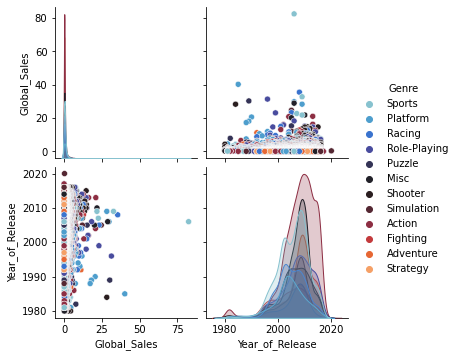

In [73]:
sns.pairplot(data_raw, hue="Genre", palette="icefire", vars=('Global_Sales','Year_of_Release'))

The lower left section of the plot shows clear peaks in genres, as well a general peak in sales overall. Globally, sports games have had a constant trend in popularity, however other genres like fighting have a high peak and immediate drop. These peaks were expected as games come in and out of popularity.

### Does critic score effect sales?

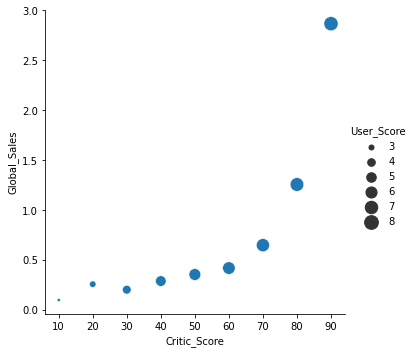

In [88]:

dcopy2 = d_cleaned
dcopy2['Critic_Score'] = dcopy2['Critic_Score'] - dcopy2['Critic_Score'] % 10
df_score = (dcopy2.groupby(['Critic_Score']).mean().reset_index())
sns.relplot(
    data=df_score,
    x="Critic_Score", y="Global_Sales", size="User_Score", sizes=(10, 200),
)

The plot confirms the relationship between critic sccore and a game's sales is positive, further it shows that the users' scores are for the most part in line with the critics'.

### Are violent games being bought less?

nan
0.777589743589759


Text(0.5, 1.0, 'Rating vs. Global Sales')

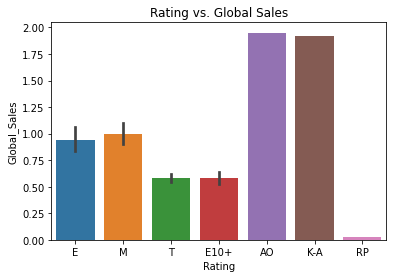

In [163]:
dfviolent = (d_cleaned[d_cleaned['Genre'] == "AO"])['Global_Sales'].mean()
reg = d_cleaned["Global_Sales"].mean()
print(dfviolent)
print(reg)
sns.barplot(x='Rating', y='Global_Sales', data=d_cleaned)
plt.title("Rating vs. Global Sales")

The barplot shows quite the opposite of our original assumption that a violent rating would negatively effect sales. Instead there's a clear favouritism toward them. As well, previously this plot had a large error which is now much smaller.

### How does Halo 3 compare to Skyladers: Spyro's Adventure?

In [164]:
print(d_cleaned[d_cleaned["Name"] == 'Halo 3'])
print(d_cleaned[d_cleaned["Name"] == "Skylanders: Spyro's Adventure"])

      Name Platform  Year_of_Release    Genre               Publisher  \
44  Halo 3     X360           2000.0  Shooter  Microsoft Game Studios   

    Global_Sales  Critic_Score  User_Score  User_Count Rating  
44         12.12          90.0         7.8      4100.0      M  
                               Name Platform  Year_of_Release   Genre  \
537   Skylanders: Spyro's Adventure      Wii           2010.0  Action   
2130  Skylanders: Spyro's Adventure     X360           2010.0  Action   
2194  Skylanders: Spyro's Adventure      PS3           2010.0  Action   
3503  Skylanders: Spyro's Adventure      3DS           2010.0  Action   

       Publisher  Global_Sales  Critic_Score  User_Score  User_Count Rating  
537   Activision          2.78          80.0         5.6        31.0   E10+  
2130  Activision          0.97          70.0         5.2        53.0   E10+  
2194  Activision          0.94          70.0         4.8        42.0   E10+  
3503  Activision          0.57          80.0   

Skylander's Spyro's Adventure was release across many platforms, so we'll take the mean of its scores.

In [165]:
spymean = (d_cleaned[d_cleaned["Name"] == "Skylanders: Spyro's Adventure"])['Critic_Score'].mean()
print(spymean)
spyusmean = (d_cleaned[d_cleaned["Name"] == "Skylanders: Spyro's Adventure"])['User_Score'].mean()
print(spyusmean)
spysalemean = (d_cleaned[d_cleaned["Name"] == "Skylanders: Spyro's Adventure"])['Global_Sales'].mean()
print(spysalemean)

75.0
5.125
1.315


Even with the accumulation of scores, my favourite childhood games doesn't even come close to Halo 3's user score of 7.8/10 and crtic score of 90/100. This is't surprisig considering Skylanders: Spyro's Adventure is an action game and Halo 3 is a shooter game, which accumulate more sales generally.